<a href="https://colab.research.google.com/github/GelsonRibeiroJr/telecom-x-churn2/blob/main/TelecomX_Modelo_Preditivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📌 Extração (coleta)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('dados_tratados.csv')
df.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [4]:
df.columns

Index(['CustomerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'Tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChargesDaily', 'ChargesMonthly',
       'ChargesTotal'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


**Remoção de Colunas Irrelevantes**

In [6]:
df = df.drop(columns=['CustomerID'])

In [7]:
df

,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,No,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,1.84,55.15,742.90
7039,Yes,Male,No,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7040,No,Male,No,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.68,50.30,92.75
7041,No,Male,No,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.26,67.85,4627.65


Agrupamento do Status **No** y **No service**

In [8]:
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df[col] = df[col].replace( 'No internet service', 'No')

Verificando valores **nulos**

In [9]:
df.isnull().sum()

,0
Churn,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


## 📊 EDA


Correlação entre variaveis **numericas**

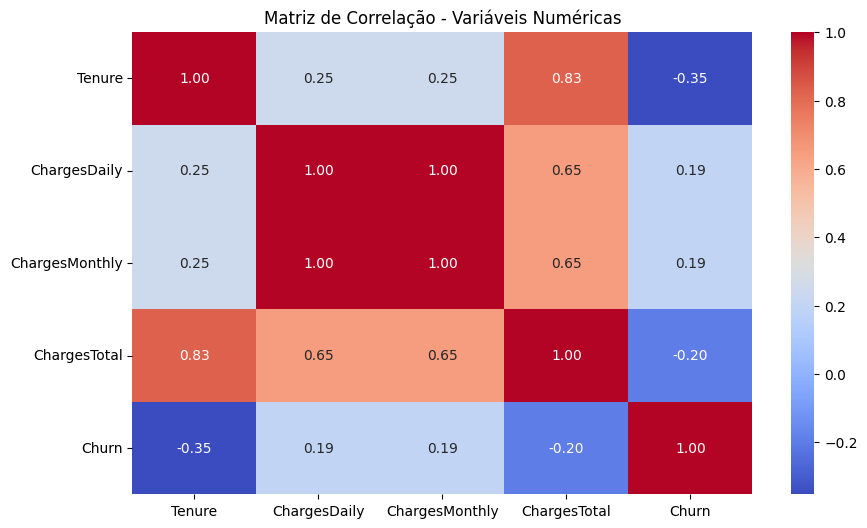

In [10]:
# Selecionar apenas variáveis numéricas
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Converter Churn para numérico
df_numeric["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


# Calcular matriz de correlação
corr_matrix = df_numeric.corr()

# Visualizar heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()


In [11]:
df = df.drop(columns=["ChargesDaily", "ChargesTotal"])

# Análise de churn por categoria **(variáveis categóricas)**

## Selecionar **variáveis categóricas**

In [12]:

categorical_cols = df.select_dtypes(include=["object"]).columns

categorical_cols = categorical_cols.drop("Churn")

## Tabela de proporção de **churn por categoria**

In [13]:
for col in categorical_cols:
    print(f"\n📌 Análise da variável: {col}")
    #Ele cria uma tabela de porcentagem de churn dentro de cada categoria de uma variável.
    display(pd.crosstab(df[col], df["Churn"], normalize="index") * 100)


📌 Análise da variável: Gender


Churn,No,Yes
Gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338



📌 Análise da variável: SeniorCitizen


Churn,No,Yes
SeniorCitizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261



📌 Análise da variável: Partner


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903



📌 Análise da variável: Dependents


Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237



📌 Análise da variável: PhoneService


Churn,No,Yes
PhoneService,,
No,75.073314,24.926686
Yes,73.290363,26.709637



📌 Análise da variável: MultipleLines


Churn,No,Yes
MultipleLines,,
No,74.975442,25.024558
Yes,71.390104,28.609896



📌 Análise da variável: InternetService


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980



📌 Análise da variável: OnlineSecurity


Churn,No,Yes
OnlineSecurity,,
No,68.670382,31.329618
Yes,85.388806,14.611194



📌 Análise da variável: OnlineBackup


Churn,No,Yes
OnlineBackup,,
No,70.827915,29.172085
Yes,78.468506,21.531494



📌 Análise da variável: DeviceProtection


Churn,No,Yes
DeviceProtection,,
No,71.348193,28.651807
Yes,77.497936,22.502064



📌 Análise da variável: TechSupport


Churn,No,Yes
TechSupport,,
No,68.813763,31.186237
Yes,84.833659,15.166341



📌 Análise da variável: StreamingTV


Churn,No,Yes
StreamingTV,,
No,75.668819,24.331181
Yes,69.929812,30.070188



📌 Análise da variável: StreamingMovies


Churn,No,Yes
StreamingMovies,,
No,75.620506,24.379494
Yes,70.058565,29.941435



📌 Análise da variável: Contract


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858



📌 Análise da variável: PaperlessBilling


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092



📌 Análise da variável: PaymentMethod


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# 1. "Criar um novo dataframe que se chama rank"
# "Criar uma cópia do nosso data frame atual"
rank = df.copy()

# 2. "Vamos converter o Churn para binário"
# (O Qui-quadrado exige que o alvo seja numérico)
rank["Churn"] = rank["Churn"].map({"Yes": 1, "No": 0})

# 3. "Separar as variáveis categóricas... seleciona todas que são do tipo objeto"
# O mentor chamou essa variável de "calls" (provavelmente var_cols ou categorical_cols)
categorical_cols = rank.select_dtypes(include=["object"]).columns

# 4. "Criar uma nova variável chamada LE de Label Encoder"
le = LabelEncoder()

# 5. "Criar um laço de repetição (for) onde todas as colunas serão transformadas"
for col in categorical_cols:
    # "Aplica o le.fit_transform e aplica novamente a todas as colunas"
    rank[col] = le.fit_transform(rank[col])

# 6. "O teste de Qui-quadrado (Chi2) cria um ranking das variáveis"
# Separamos X (características) e y (Churn)
X = rank[categorical_cols]
y = rank["Churn"]

# Aplicamos o Chi2 (o "Titu/Chitu" que o mentor mencionou)
chi_scores, p_values = chi2(X, y)

# 7. Criando o DataFrame do Ranking para visualização
chi_df = pd.DataFrame({
    "Variável": categorical_cols,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

# Exibindo o resultado
print("🏆 Ranking de Importância (Qui-Quadrado):")
display(chi_df)

🏆 Ranking de Importância (Qui-Quadrado):


,Variável,Chi2 Score,p-value
13,Contract,1115.780167,1.227941e-244
7,OnlineSecurity,147.295858,6.761696e-34
10,TechSupport,135.559783,2.490549e-31
1,SeniorCitizen,134.351545,4.576959e-31
3,Dependents,133.036443,8.876729e-31
14,PaperlessBilling,105.680863,8.661987e-25
2,Partner,82.412083,1.104764e-19
15,PaymentMethod,58.492250,2.040933e-14
8,OnlineBackup,31.217694,2.306541e-08
9,DeviceProtection,20.226662,6.878750e-06
